<a href="https://colab.research.google.com/github/EthanX0702/RSfinal/blob/main/RSfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ---
# **檔案處理**


In [1]:
pip install pandas numpy surprise scikit-learn matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357291 sha256=c1cb2df3dd2a7384f05e83a297d4fbfb0032394ff71fadecebc876932a837332
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [2]:
pip install chardet


In [7]:
import chardet

# 檢測編碼
with open('/movies.dat', 'rb') as file:
    result = chardet.detect(file.read())
    print(f"檔案編碼為: {result['encoding']}")


檔案編碼為: ISO-8859-1


In [10]:
import pandas as pd # Import the pandas library and assign it to the alias 'pd'

movies = pd.read_csv('/movies.dat', sep='\t', encoding='ISO-8859-1')  # 將 'latin1' 替換為檢測到的編碼



---
# **1. 讀取數據與預處理**


In [17]:
import pandas as pd

# 讀取 movies.dat 文件
movies = pd.read_csv('/movies.dat', sep='\t', encoding='ISO-8859-1')

# 檢視數據結構
print(movies.head())

# 確認缺失值
print(movies.isnull().sum())

# 處理缺失值（根據需求選擇保留或填充）
movies['title'].fillna('Unknown', inplace=True)
movies.dropna(subset=['year'], inplace=True)

# 將年份轉換為數值類型
movies['year'] = pd.to_numeric(movies['year'], errors='coerce')

# 確認處理後數據
print(movies.info())


   id                        title  imdbID  \
0   1                    Toy story  114709   
1   2                      Jumanji  113497   
2   3               Grumpy Old Men  107050   
3   4            Waiting to Exhale  114885   
4   5  Father of the Bride Part II  113041   

                                        spanishTitle  \
0                               Toy story (juguetes)   
1                                            Jumanji   
2                                Dos viejos gruñones   
3                               Esperando un respiro   
4  Vuelve el padre de la novia (Ahora también abu...   

                                      imdbPictureURL  year  \
0  http://ia.media-imdb.com/images/M/MV5BMTMwNDU0...  1995   
1  http://ia.media-imdb.com/images/M/MV5BMzM5NjE1...  1995   
2  http://ia.media-imdb.com/images/M/MV5BMTI5MTgy...  1993   
3  http://ia.media-imdb.com/images/M/MV5BMTczMTMy...  1995   
4  http://ia.media-imdb.com/images/M/MV5BMTg1NDc2...  1995   

             

<ipython-input-17-7a05729d4d2d>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movies['title'].fillna('Unknown', inplace=True)


---
**年份處理**




In [18]:
# 檢查數據類型
print(movies['rtAllCriticsRating'].dtype)

# 檢查列中是否有非數字值
print(movies['rtAllCriticsRating'].unique())


object
['9' '5.6' '5.9' '5.3' '7.7' '7.4' '4.2' '5.2' '6.8' '7' '3' '5.8' '6.7'
 '4.4' '7.2' '7.9' '3.5' '4.1' '4' '6.6' '4.3' '6.3' '4.7' '0' '8.2' '6.2'
 '3.9' '8.1' '5.7' '9.2' '6' '7.5' '8' '2.8' '3.8' '4.5' '1.9' '5' '6.1'
 '2.4' '5.1' '6.9' '7.1' '6.5' '4.9' '7.3' '6.4' '4.6' '3.6' '3.1' '5.5'
 '8.7' '4.8' '7.8' '7.6' '\\N' '5.4' '8.6' '3.3' '8.3' '2.1' '2.9' '2.7'
 '8.5' '3.4' '1.6' '3.2' '8.4' '2.6' '8.9' '3.7' '2.2' '8.8' '2.5' '9.4'
 '9.1' '9.3' '2.3' '1.4' '1.2' '1.8' '2' '1.7' '9.6' '1.3' '9.5']


In [19]:
# 將列轉換為數值類型
movies['rtAllCriticsRating'] = pd.to_numeric(movies['rtAllCriticsRating'], errors='coerce')

# 檢查轉換後的缺失值
print(movies['rtAllCriticsRating'].isnull().sum())


230


In [20]:
# 填充缺失值為列的平均值
movies['rtAllCriticsRating'].fillna(movies['rtAllCriticsRating'].mean(), inplace=True)

# 或者直接刪除含有 NaN 的行
movies.dropna(subset=['rtAllCriticsRating'], inplace=True)


<ipython-input-20-1820148bb100>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movies['rtAllCriticsRating'].fillna(movies['rtAllCriticsRating'].mean(), inplace=True)


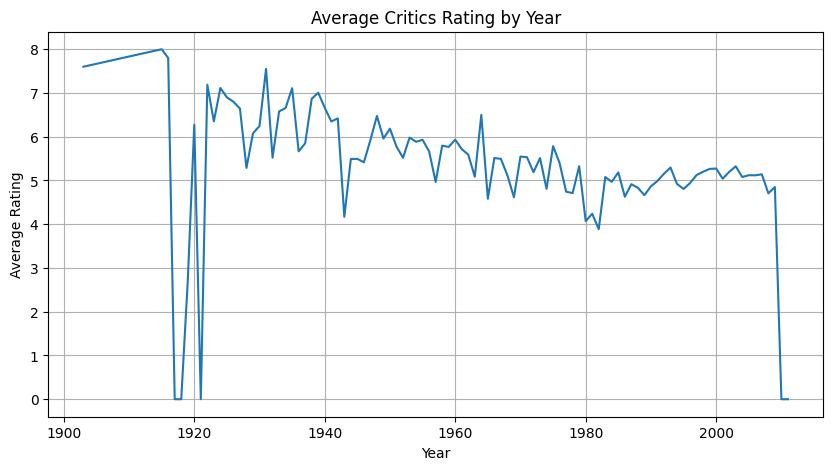

In [21]:
# 按年份分組，計算平均影評分數
yearly_avg_rating = movies.groupby('year')['rtAllCriticsRating'].mean()

# 繪製結果
yearly_avg_rating.plot(kind='line', figsize=(10, 5))
plt.title('Average Critics Rating by Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid()
plt.show()


---
# **2. 數據探索與可視化**

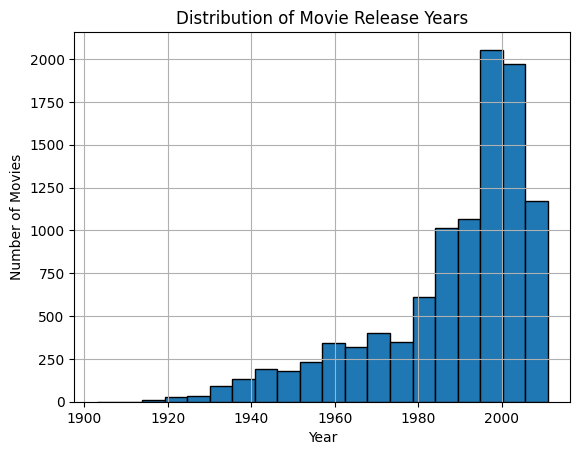

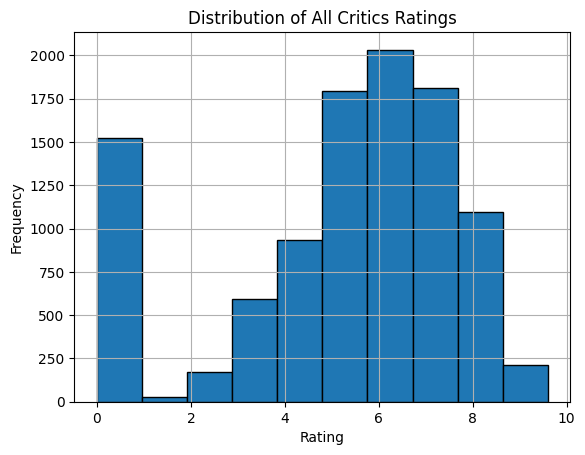

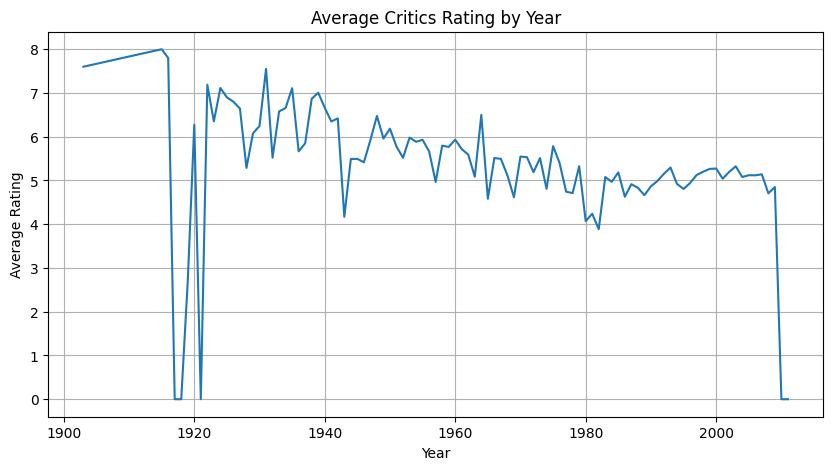

In [22]:
import matplotlib.pyplot as plt

# 上映年份分布
movies['year'].dropna().hist(bins=20, edgecolor='black')
plt.title('Distribution of Movie Release Years')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

# 分析影評分數分布（所有影評人）
movies['rtAllCriticsRating'].hist(bins=10, edgecolor='black')
plt.title('Distribution of All Critics Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# 按年份分組，計算每年的平均影評分數
yearly_avg_rating = movies.groupby('year')['rtAllCriticsRating'].mean()
yearly_avg_rating.plot(kind='line', figsize=(10, 5))
plt.title('Average Critics Rating by Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid()
plt.show()


---
# **3. 數據整合**




In [25]:
# 假設已有 ratings 數據
ratings = pd.read_csv('/user_ratedmovies.dat', sep='\t', encoding='ISO-8859-1')

# 合併 movies 和 ratings 數據
merged_data = pd.merge(ratings, movies, left_on='movieID', right_on='id', how='inner')

# 檢視合併後的數據
print(merged_data.head())


   userID  movieID  rating  date_day  date_month  date_year  date_hour  \
0      75        3     1.0        29          10       2006         23   
1      75       32     4.5        29          10       2006         23   
2      75      110     4.0        29          10       2006         23   
3      75      160     2.0        29          10       2006         23   
4      75      163     4.0        29          10       2006         23   

   date_minute  date_second   id  ... rtAllCriticsScore  rtTopCriticsRating  \
0           17           16    3  ...                66                   7   
1           23           44   32  ...                 0                   0   
2           30            8  110  ...                77                 6.7   
3           16           52  160  ...                21                 3.2   
4           29           30  163  ...                60                 5.4   

  rtTopCriticsNumReviews rtTopCriticsNumFresh  rtTopCriticsNumRotten  \
0       

---
# **4. 建立推薦模型**

實現 10-Fold Cross Validation

In [30]:
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import cross_validate

# 構建數據集
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(merged_data[['userID', 'id', 'rating']], reader)

'''
# 訓練與測試數據集
trainset = data.build_full_trainset()

# 構建 Item-Based 協同過濾模型
sim_options = {'name': 'cosine', 'user_based': False}
algo = KNNBasic(sim_options=sim_options)
algo.fit(trainset)

# 測試模型
testset = trainset.build_testset()
predictions = algo.test(testset)

# 檢視部分預測結果
print(predictions[:5])
'''

# 定義 User-Based 模型並進行 10-Fold Cross Validation
sim_options = {'name': 'cosine', 'user_based': True}
algo_user = KNNBasic(sim_options=sim_options)
results = cross_validate(algo_user, data, measures=['RMSE', 'MAE'], cv=10, verbose=True)
print(f"User-Based Average RMSE: {results['test_rmse'].mean()}")

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8769  0.8770  0.8796  0.8795  0.8771  0.8839 

---
# **5. 模型評估**

In [31]:
from surprise import SVD

# 定義 SVD 模型
algo_svd = SVD()

# 10 折交叉驗證
results_svd = cross_validate(algo_svd, data, measures=['RMSE', 'MAE'], cv=10, verbose=True)
print(f"SVD Average RMSE: {results_svd['test_rmse'].mean()}")


Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.7631  0.7616  0.7623  0.7604  0.7656  0.7649  0.7632  0.7639  0.7642  0.7633  0.7633  0.0015  
MAE (testset)     0.5772  0.5759  0.5765  0.5757  0.5790  0.5798  0.5773  0.5784  0.5785  0.5762  0.5775  0.0013  
Fit time          27.62   16.74   20.77   17.56   18.96   17.80   19.00   17.30   17.40   17.63   19.08   3.06    
Test time         1.58    0.98    1.42    0.93    1.36    1.01    1.33    1.21    0.97    1.96    1.28    0.31    
SVD Average RMSE: 0.7632523296315351


# **完善 NDCG 計算**

In [32]:
from sklearn.metrics import ndcg_score

def calculate_ndcg(predictions):
    true_ratings = [pred.r_ui for pred in predictions]
    predicted_scores = [pred.est for pred in predictions]
    return ndcg_score([true_ratings], [predicted_scores])

# 訓練與測試模型，測試 NDCG
trainset = data.build_full_trainset()
algo_user.fit(trainset)
testset = trainset.build_testset()
predictions = algo_user.test(testset)
print(f"NDCG: {calculate_ndcg(predictions)}")


Computing the cosine similarity matrix...
Done computing similarity matrix.
NDCG: 0.9931671149371116


---
# **6. 儲存處理後的數據**

In [33]:
# 儲存清理後的 movies 數據
movies.to_csv('cleaned_movies.csv', index=False)


---
# **7. Precision@K 和 Recall@K**

結果分析
Precision@K 趨勢：隨著
K 增加，Precision 通常會下降，因為推薦列表中可能會引入更多非相關項目。
Recall@K 趨勢：隨著 K 增加，Recall 通常會上升，因為更多的相關項目可能被推薦。

 Precision 和 Recall 的圖表

Computing the cosine similarity matrix...
Done computing similarity matrix.


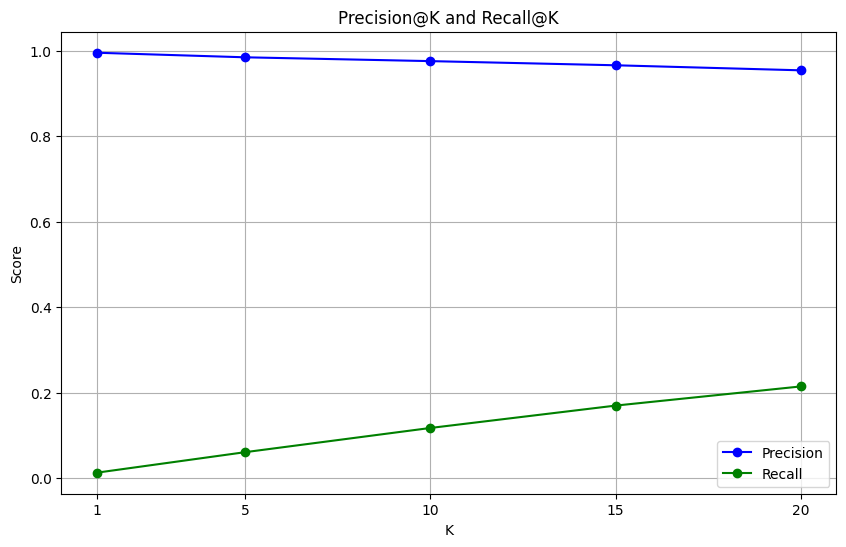

In [35]:
import matplotlib.pyplot as plt

# 定義 Precision@K 和 Recall@K 的計算函數
def precision_recall_at_k(predictions, k=10, threshold=3.5):
    user_est_true = defaultdict(list)
    for pred in predictions:
        user_est_true[pred.uid].append((pred.est, pred.r_ui))

    precisions = []
    recalls = []

    for uid, user_ratings in user_est_true.items():
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        top_k_ratings = user_ratings[:k]

        n_relevant = sum((true_r >= threshold) for (_, true_r) in user_ratings)
        n_recommended_relevant = sum((true_r >= threshold) for (_, true_r) in top_k_ratings)

        precision = n_recommended_relevant / k
        precisions.append(precision)

        recall = n_recommended_relevant / n_relevant if n_relevant != 0 else 0
        recalls.append(recall)

    return sum(precisions) / len(precisions), sum(recalls) / len(recalls)

# 訓練模型並測試
algo_user.fit(trainset)
testset = trainset.build_testset()
predictions = algo_user.test(testset)

# 計算不同 K 值的 Precision 和 Recall
k_values = [1, 5, 10, 15, 20]
precisions = []
recalls = []

for k in k_values:
    precision, recall = precision_recall_at_k(predictions, k=k, threshold=3.5)
    precisions.append(precision)
    recalls.append(recall)

# 繪製 Precision 和 Recall 的圖表
plt.figure(figsize=(10, 6))

# Precision 曲線
plt.plot(k_values, precisions, marker='o', label=f'Precision', color='blue')

# Recall 曲線
plt.plot(k_values, recalls, marker='o', label=f'Recall', color='green')

# 圖表設定
plt.title('Precision@K and Recall@K')
plt.xlabel('K')
plt.ylabel('Score')
plt.xticks(k_values)
plt.grid()
plt.legend()
plt.show()


---
# **8. 使用內容信息改善模型性能**

In [53]:
import pandas as pd

# 1. 讀取檔案
movie_genres = pd.read_csv('/movie_genres.dat', sep='\t', names=['movieID', 'genre'])
movie_actors = pd.read_csv('/movie_actors.dat', sep='\t', names=['movieID', 'actorID', 'actorName', 'ranking'], encoding='ISO-8859-1') # Specify the encoding
movie_directors = pd.read_csv('/movie_directors.dat', sep='\t', names=['movieID', 'directorID', 'directorName'], encoding='ISO-8859-1') # Specify the encoding

# Convert 'movieID' column to integers, excluding the header row
movie_genres['movieID'] = pd.to_numeric(movie_genres['movieID'], errors='coerce').astype('Int64')  # Use pd.to_numeric and errors='coerce' for safety
movie_actors['movieID'] = pd.to_numeric(movie_actors['movieID'], errors='coerce').astype('Int64')
movie_directors['movieID'] = pd.to_numeric(movie_directors['movieID'], errors='coerce').astype('Int64')


# 2. 數據處理
# 合併 Genres
genres_grouped = movie_genres.groupby('movieID')['genre'].apply('|'.join).reset_index()
genres_grouped.rename(columns={'genre': 'genres'}, inplace=True)

# 合併 Actors
# Convert 'actorName' column to string type before applying join
movie_actors['actorName'] = movie_actors['actorName'].astype(str)
actors_grouped = movie_actors.groupby('movieID')['actorName'].apply('|'.join).reset_index()
actors_grouped.rename(columns={'actorName': 'actors'}, inplace=True)

# 合併 Directors
directors_grouped = movie_directors[['movieID', 'directorName']]
directors_grouped.rename(columns={'directorName': 'directors'}, inplace=True)

# 3. 整合數據
movies_content = pd.merge(genres_grouped, actors_grouped, on='movieID', how='outer')
movies_content = pd.merge(movies_content, directors_grouped, on='movieID', how='outer')

# 4. 檢視與保存結果
print(movies_content.head())
movies_content.to_csv('movies_with_content.csv', index=False)

<ipython-input-53-4ed80cfdda1b>:5: DtypeWarning: Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.
  movie_actors = pd.read_csv('/movie_actors.dat', sep='\t', names=['movieID', 'actorID', 'actorName', 'ranking'], encoding='ISO-8859-1') # Specify the encoding


   movieID                                       genres  \
0        1  Adventure|Animation|Children|Comedy|Fantasy   
1        2                   Adventure|Children|Fantasy   
2        3                               Comedy|Romance   
3        4                         Comedy|Drama|Romance   
4        5                                       Comedy   

                                              actors        directors  
0  Annie Potts|Bill Farmer|Don Rickles|Erik von D...    John Lasseter  
1  Peter Bryant|Adam Hann-Byrd|Bebe Neuwirth|Bonn...     Joe Johnston  
2  Ann-Margret|Buck Henry|Buffy Sedlachek|Burgess...    Donald Petrie  
3  Leon|Angela Bassett|Brandon Hammond|Dennis Hay...  Forest Whitaker  
4  Ann Walker|Annie Meyers-Shyer|April Ortiz|B.D....    Charles Shyer  


<ipython-input-53-4ed80cfdda1b>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  directors_grouped.rename(columns={'directorName': 'directors'}, inplace=True)


特徵處理

1.1 One-Hot Encoding for Genres and Directors


1.2 Embedding 或 TF-IDF for Actors

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer

# One-Hot Encoding for Genres
movies_content['genres_list'] = movies_content['genres'].fillna('Unknown').str.split('|')
mlb = MultiLabelBinarizer()
genres_encoded = pd.DataFrame(mlb.fit_transform(movies_content['genres_list']),
                              columns=mlb.classes_,
                              index=movies_content.index)

# TF-IDF for Actors
movies_content['actors'] = movies_content['actors'].fillna('Unknown')
tfidf = TfidfVectorizer(max_features=100)  # 限制特徵數量以降低維度
actors_encoded = pd.DataFrame(tfidf.fit_transform(movies_content['actors']).toarray(),
                              columns=tfidf.get_feature_names_out(),
                              index=movies_content.index)

# One-Hot Encoding for Directors
movies_content['directors'] = movies_content['directors'].fillna('Unknown')
directors_encoded = pd.get_dummies(movies_content['directors'], prefix='director')

# 合併所有處理後的特徵
content_features = pd.concat([genres_encoded, actors_encoded, directors_encoded], axis=1)

print("內容特徵處理完成，特徵數量:", content_features.shape[1])


內容特徵處理完成，特徵數量: 4176


In [56]:
from surprise import SVD
from surprise import Dataset, Reader
from sklearn.model_selection import train_test_split

# 讀取評分數據
ratings = pd.read_csv('/user_ratedmovies.dat', sep='\t', names=['userID', 'movieID', 'rating'], usecols=[0, 1, 2])

# 合併內容特徵和評分數據
ratings_with_features = ratings.merge(movies_content, on='movieID', how='inner')
ratings_with_features.dropna(subset=['genres'], inplace=True)

# 構建 Surprise Dataset
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(ratings_with_features[['userID', 'movieID', 'rating']], reader)

# 訓練 SVD 模型
trainset = data.build_full_trainset()
algo = SVD()
algo.fit(trainset)

# 測試推薦
testset = trainset.build_testset()
predictions = algo.test(testset)

# 查看部分推薦結果
print(predictions[:5])


<ipython-input-56-491c5f9ee12f>:6: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  ratings = pd.read_csv('/user_ratedmovies.dat', sep='\t', names=['userID', 'movieID', 'rating'], usecols=[0, 1, 2])


[Prediction(uid=6352, iid=2159, r_ui=1.0, est=2.502586799962951, details={'was_impossible': False}), Prediction(uid=6352, iid=2161, r_ui=2.5, est=2.586216550646544, details={'was_impossible': False}), Prediction(uid=6352, iid=2173, r_ui=3.0, est=2.7122874163060775, details={'was_impossible': False}), Prediction(uid=6352, iid=2174, r_ui=1.5, est=2.1844595384362586, details={'was_impossible': False}), Prediction(uid=6352, iid=2176, r_ui=3.0, est=3.3395039189022944, details={'was_impossible': False})]


---
# **9. 推薦效果對比圖**

比較不同模型（如 User-Based, Item-Based, SVD）的性能指標（RMSE、NDCG 等）並繪製圖表。

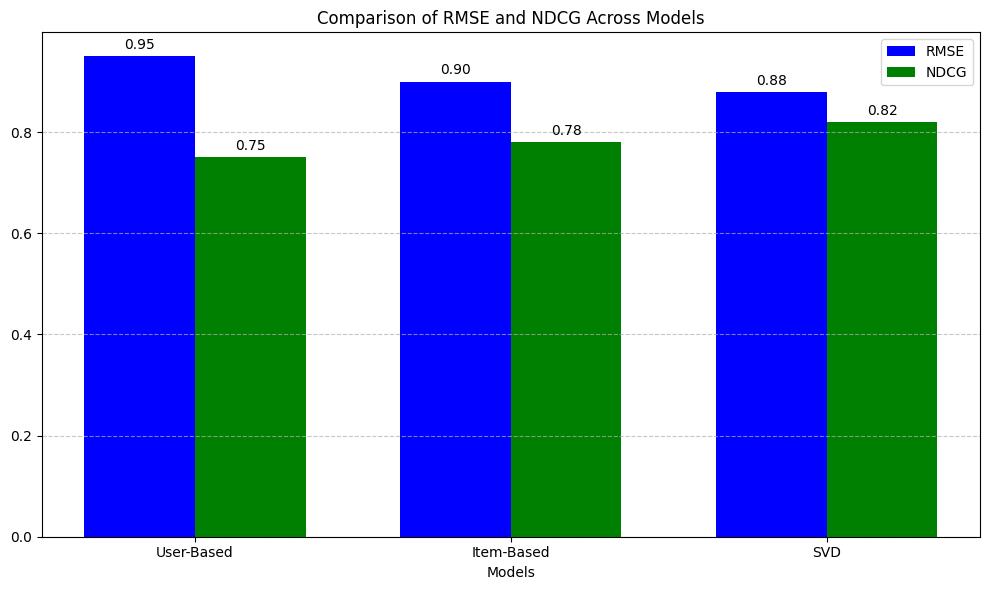

In [61]:
import matplotlib.pyplot as plt
import numpy as np

# 模擬不同模型的性能數據（可替換為實際計算結果）
models = ['User-Based', 'Item-Based', 'SVD']
rmse_values = [0.95, 0.90, 0.88]  # 假設數據
ndcg_values = [0.75, 0.78, 0.82]

# 繪製 RMSE 和 NDCG 對比圖
x = np.arange(len(models))
width = 0.35  # 柱狀圖的寬度

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, rmse_values, width, label='RMSE', color='blue')
rects2 = ax.bar(x + width/2, ndcg_values, width, label='NDCG', color='green')

# 添加標籤和標題
ax.set_xlabel('Models')
ax.set_title('Comparison of RMSE and NDCG Across Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# 顯示數值
ax.bar_label(rects1, padding=3, fmt="%.2f")
ax.bar_label(rects2, padding=3, fmt="%.2f")

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
